# Mesclagem de dataframes

In [1]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# retirar avisos
import warnings
warnings.filterwarnings("ignore")

In [63]:
df = pd.read_csv("../dados/PEDE_PASSOS_DATASET_FIAP.csv", sep= ";")
df.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)


In [64]:
df.shape

(1349, 69)

### Criação de dataframes específicos por ano

In [65]:
df_2020 = df[[col for col in df.columns if "2020" in col]].copy() #filtra as colunas com "_2020" e adiciona em um novo df
df_2020.columns = [col.replace("_2020", "") for col in df_2020.columns] # retira caractere numérico da coluna para padronizar
df_2020["NOME"] = df["NOME"] #adiciona identificador do aluno
df_2020["ANO_PESQUISA"] = 2020 #adiciona coluna de ano
cols_nulo_2020 = df_2020.columns.difference(['NOME', 'ANO_PESQUISA']) # excluir
df_2020 = df_2020.dropna(how='all', subset=cols_nulo_2020).reset_index() # Excluir linhas onde todas as colunas no subset especificado são NaN

df_2021 = df[[col for col in df.columns if "2021" in col]].copy() #filtra as colunas com "_2021" e adiciona em um novo df
df_2021.columns = [col.replace("_2021", "") for col in df_2021.columns] # retira caractere numérico da coluna para padronizar
df_2021["NOME"] = df["NOME"] #adiciona identificador do aluno
df_2021["ANO_PESQUISA"] = 2021 #adiciona coluna de ano
cols_nulo_2021 = df_2021.columns.difference(['NOME', 'ANO_PESQUISA']) # excluir
df_2021 = df_2021.dropna(how='all', subset=cols_nulo_2021).reset_index() # Excluir linhas onde todas as colunas no subset especificado são NaN


df_2022 = df[[col for col in df.columns if "2022" in col]].copy() #filtra as colunas com "_2022" e adiciona em um novo df
df_2022.columns = [col.replace("_2022", "") for col in df_2022.columns] # retira caractere numérico da coluna para padronizar
df_2022["NOME"] = df["NOME"] #adiciona identificador do aluno
df_2022["ANO_PESQUISA"] = 2022 #adiciona coluna de ano
cols_nulo_2022 = df_2022.columns.difference(['NOME', 'ANO_PESQUISA']) # excluir
df_2022 = df_2022.dropna(how='all', subset=cols_nulo_2022).reset_index() # Excluir linhas onde todas as colunas no subset especificado são NaN

In [66]:
df_2022['REC_AVA_4'].value_counts()

REC_AVA_4
Promovido de Fase + Bolsa    91
Promovido de Fase            78
Mantido na Fase atual        65
Alocado em Fase anterior     38
Mantido na Fase + Bolsa      13
Name: count, dtype: int64

In [67]:
# Separação de dados entre "FASE_TURMA" no df_2020 para ficar similar aos demais
df_2020[['FASE', 'TURMA']] = df_2020['FASE_TURMA'].str.extract('(\d+)(\D+)')
df_2020 = df_2020.drop(['FASE_TURMA'], axis=1) #excluindo coluna principal
col_2020 = df_2020.columns

### Padronização de colunas

In [68]:
col_2020 = list(df_2020.columns)

In [69]:
col_2021 = list(df_2021.columns)

In [70]:
col_2022 = list(df_2022.columns)

In [71]:
colunas_unicas = list(set(col_2020 + col_2021 + col_2022)) # agregar todas colunas dos 3 dataframes em uma única lista, excluindo valores duplicados

# função para validar quais colunas não estão presentes no dataframe e adiciona
def adicionar_colunas_faltantes(df, colunas_unicas):
    for col in colunas_unicas:
        if col not in df.columns:
            df[col] = None  # deixa valores da coluna zerados

In [72]:
adicionar_colunas_faltantes(df_2020, colunas_unicas)
df_2020.head()

,index,INSTITUICAO_ENSINO_ALUNO,IDADE_ALUNO,ANOS_PM,PONTO_VIRADA,INDE,INDE_CONCEITO,PEDRA,DESTAQUE_IEG,DESTAQUE_IDA,...,CT,NOTA_ING,NIVEL_IDEAL,REC_EQUIPE_3,CF,REC_EQUIPE_2,REC_AVA_4,NOTA_MAT,REC_AVA_2,CG
0,0,Escola Pública,11,2,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,...,None,None,None,None,None,None,None,None,None,None
1,2,Escola Pública,12,2,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,...,None,None,None,None,None,None,None,None,None,None
2,3,Escola Pública,10,2,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,...,None,None,None,None,None,None,None,None,None,None
3,4,Escola Pública,10,1,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,...,None,None,None,None,None,None,None,None,None,None
4,7,Rede Decisão/União,14,3,Sim,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,...,None,None,None,None,None,None,None,None,None,None


In [73]:
adicionar_colunas_faltantes(df_2021, colunas_unicas)
df_2021.head()

,index,FASE,TURMA,INSTITUICAO_ENSINO_ALUNO,SINALIZADOR_INGRESSANTE,PEDRA,INDE,IAA,IEG,IPS,...,CT,NOTA_ING,INDE_CONCEITO,DESTAQUE_IPV,CF,IDADE_ALUNO,REC_AVA_4,NOTA_MAT,REC_AVA_2,CG
0,0,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,...,None,None,None,None,None,None,None,None,None,None
1,2,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,...,None,None,None,None,None,None,None,None,None,None
2,4,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,...,None,None,None,None,None,None,None,None,None,None
3,7,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,...,None,None,None,None,None,None,None,None,None,None
4,10,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,...,None,None,None,None,None,None,None,None,None,None


In [74]:
adicionar_colunas_faltantes(df_2022, colunas_unicas)
df_2022.head()

,index,FASE,TURMA,ANO_INGRESSO,BOLSISTA,INDE,CG,CF,CT,PEDRA,...,SINALIZADOR_INGRESSANTE,REC_EQUIPE_4,DEFASAGEM,REC_EQUIPE_1,ANOS_PM,INSTITUICAO_ENSINO_ALUNO,INDE_CONCEITO,REC_EQUIPE_3,IDADE_ALUNO,REC_EQUIPE_2
0,1,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,...,None,None,None,None,None,None,None,None,None,None
1,3,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,...,None,None,None,None,None,None,None,None,None,None
2,4,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,...,None,None,None,None,None,None,None,None,None,None
3,5,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,...,None,None,None,None,None,None,None,None,None,None
4,6,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,...,None,None,None,None,None,None,None,None,None,None


### Concatenação dos dataframes

In [75]:
df_final_passos = pd.concat([df_2020, df_2021, df_2022], ignore_index=True)
df_final_passos.shape

(2276, 43)

In [76]:
print(len(df_final_passos.columns))
df_final_passos.columns

43


Index(['index', 'INSTITUICAO_ENSINO_ALUNO', 'IDADE_ALUNO', 'ANOS_PM',
       'PONTO_VIRADA', 'INDE', 'INDE_CONCEITO', 'PEDRA', 'DESTAQUE_IEG',
       'DESTAQUE_IDA', 'DESTAQUE_IPV', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP',
       'IPV', 'IAN', 'NOME', 'ANO_PESQUISA', 'FASE', 'TURMA', 'ANO_INGRESSO',
       'INDICADO_BOLSA', 'BOLSISTA', 'REC_AVA_1', 'SINALIZADOR_INGRESSANTE',
       'REC_AVA_3', 'REC_EQUIPE_4', 'DEFASAGEM', 'REC_EQUIPE_1', 'NOTA_PORT',
       'QTD_AVAL', 'CT', 'NOTA_ING', 'NIVEL_IDEAL', 'REC_EQUIPE_3', 'CF',
       'REC_EQUIPE_2', 'REC_AVA_4', 'NOTA_MAT', 'REC_AVA_2', 'CG'],
      dtype='object')

In [77]:
colunas = ['IEG', 'IDA', 'IPV', 'IAA', 'IPS', 'IPP', 'IAN', 'IDADE_ALUNO', 'ANOS_PM', 'INDE']
for coluna in colunas:
    df_final_passos[coluna] = pd.to_numeric(df_final_passos[coluna], errors='coerce')


df_final_passos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     2276 non-null   int64  
 1   INSTITUICAO_ENSINO_ALUNO  1414 non-null   object 
 2   IDADE_ALUNO               727 non-null    float64
 3   ANOS_PM                   727 non-null    float64
 4   PONTO_VIRADA              2250 non-null   object 
 5   INDE                      2273 non-null   float64
 6   INDE_CONCEITO             728 non-null    object 
 7   PEDRA                     2276 non-null   object 
 8   DESTAQUE_IEG              1590 non-null   object 
 9   DESTAQUE_IDA              1590 non-null   object 
 10  DESTAQUE_IPV              1565 non-null   object 
 11  IAA                       2275 non-null   float64
 12  IEG                       2275 non-null   float64
 13  IPS                       2275 non-null   float64
 14  IDA     

In [79]:
# organiza dados em colunas
df_final_passos = df_final_passos[['NOME','ANO_PESQUISA','ANO_INGRESSO','INSTITUICAO_ENSINO_ALUNO','IDADE_ALUNO','ANOS_PM','FASE','TURMA','NIVEL_IDEAL','PONTO_VIRADA','INDICADO_BOLSA','BOLSISTA','INDE','INDE_CONCEITO','PEDRA','DESTAQUE_IEG','DESTAQUE_IDA','DESTAQUE_IPV','IEG','IDA','IPV','IAA','IPS','IPP','IAN','CF','CG','CT','QTD_AVAL','REC_AVA_1','REC_AVA_2','REC_AVA_3','REC_AVA_4','REC_EQUIPE_1','REC_EQUIPE_2','REC_EQUIPE_3','REC_EQUIPE_4','DEFASAGEM','SINALIZADOR_INGRESSANTE','NOTA_PORT','NOTA_MAT','NOTA_ING']]
df_final_passos.head()

,NOME,ANO_PESQUISA,ANO_INGRESSO,INSTITUICAO_ENSINO_ALUNO,IDADE_ALUNO,ANOS_PM,FASE,TURMA,NIVEL_IDEAL,PONTO_VIRADA,...,REC_AVA_4,REC_EQUIPE_1,REC_EQUIPE_2,REC_EQUIPE_3,REC_EQUIPE_4,DEFASAGEM,SINALIZADOR_INGRESSANTE,NOTA_PORT,NOTA_MAT,NOTA_ING
0,ALUNO-1,2020,NaN,Escola Pública,11.0,2.0,2,H,None,Não,...,None,None,None,None,None,NaN,None,NaN,NaN,NaN
1,ALUNO-3,2020,NaN,Escola Pública,12.0,2.0,3,H,None,Não,...,None,None,None,None,None,NaN,None,NaN,NaN,NaN
2,ALUNO-4,2020,NaN,Escola Pública,10.0,2.0,1,D,None,Não,...,None,None,None,None,None,NaN,None,NaN,NaN,NaN
3,ALUNO-5,2020,NaN,Escola Pública,10.0,1.0,2,M,None,Não,...,None,None,None,None,None,NaN,None,NaN,NaN,NaN
4,ALUNO-8,2020,NaN,Rede Decisão/União,14.0,3.0,4,L,None,Sim,...,None,None,None,None,None,NaN,None,NaN,NaN,NaN


In [80]:
# exporta base final
df_final_passos.to_csv('df_final_passos-v2.csv')

# Novo tratamento das bases (ajustes de colunas e etc)

In [81]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [82]:
df_final_passos = pd.read_csv("df_final_passos-v2.csv", sep= ",")
df_final_passos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2276 non-null   int64  
 1   NOME                      2276 non-null   object 
 2   ANO_PESQUISA              2276 non-null   int64  
 3   ANO_INGRESSO              862 non-null    float64
 4   INSTITUICAO_ENSINO_ALUNO  1414 non-null   object 
 5   IDADE_ALUNO               727 non-null    float64
 6   ANOS_PM                   727 non-null    float64
 7   FASE                      2275 non-null   float64
 8   TURMA                     2275 non-null   object 
 9   NIVEL_IDEAL               1548 non-null   object 
 10  PONTO_VIRADA              2250 non-null   object 
 11  INDICADO_BOLSA            862 non-null    object 
 12  BOLSISTA                  862 non-null    object 
 13  INDE                      2273 non-null   float64
 14  INDE_CON

In [83]:
df_final_filtrado = df_final_passos[['NOME','ANO_PESQUISA','ANO_INGRESSO','INSTITUICAO_ENSINO_ALUNO','BOLSISTA','ANOS_PM','FASE','TURMA','NIVEL_IDEAL','PONTO_VIRADA','INDE','PEDRA','IEG','IDA','IPV','IAA','IPS','IPP','IAN','CF','CG','CT','NOTA_PORT','NOTA_MAT','NOTA_ING']]
excluir_outlier = df_final_filtrado[df_final_filtrado['NOME'] == 'ALUNO-1259'].index
df_final_filtrado = df_final_filtrado.drop(excluir_outlier)
df_final_filtrado.head(5)

,NOME,ANO_PESQUISA,ANO_INGRESSO,INSTITUICAO_ENSINO_ALUNO,BOLSISTA,ANOS_PM,FASE,TURMA,NIVEL_IDEAL,PONTO_VIRADA,...,IAA,IPS,IPP,IAN,CF,CG,CT,NOTA_PORT,NOTA_MAT,NOTA_ING
0,ALUNO-1,2020,NaN,Escola Pública,NaN,2.0,2.0,H,NaN,Não,...,8.50002,7.500,5.9375,10.0,NaN,NaN,NaN,NaN,NaN,NaN
1,ALUNO-3,2020,NaN,Escola Pública,NaN,2.0,3.0,H,NaN,Não,...,7.91667,7.500,8.1250,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2,ALUNO-4,2020,NaN,Escola Pública,NaN,2.0,1.0,D,NaN,Não,...,8.00002,6.875,7.1875,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,ALUNO-5,2020,NaN,Escola Pública,NaN,1.0,2.0,M,NaN,Não,...,7.50002,7.500,8.4375,10.0,NaN,NaN,NaN,NaN,NaN,NaN
4,ALUNO-8,2020,NaN,Rede Decisão/União,NaN,3.0,4.0,L,NaN,Sim,...,8.33334,4.375,8.7500,10.0,NaN,NaN,NaN,NaN,NaN,NaN


### Excluir linha com dados imprecisos

In [84]:
# df_final_filtrado[df_final_filtrado["NOME"] == "ALUNO-1259"]


In [ ]:
# retirar linhas com esse aluno (outlier e sem dados precisos)
# excluir_outlier = df_final_filtrado[df_final_filtrado['NOME'] == 'ALUNO-1259'].index
# df_final_filtrado = df_final_filtrado.drop(excluir_outlier)

## Ajuste colunas

### Ajuste dados Nível ideal

In [85]:
dict_nivel_ideal = {
    "ALFA  (2o e 3o ano)"       :	0.5,
    "ALFA  (2º e 3º ano)"       :	0.5,
    "Nível 1 (4o ano)"          :	1,
    "Fase 1 (4º ano)"           :	1,
    "Nível 2 (5o e 6o ano)"     :	2,
    "Fase 2 (5º e 6º ano)"      :	2,
    "Nível 3 (7o e 8o ano)"     :	3,
    "Fase 3 (7º e 8º ano)"      :	3,
    "Fase 4 (9º ano)"           :	4,
    "Nível 4 (9o ano)"          :	4,
    "Fase 5 (1º EM)"            :	5,
    "Nível 5 (1o EM)"           :	5,
    "Fase 6 (2º EM)"            :	6,
    "Nível 6 (2o EM)"           :	6,
    "Fase 7 (3º EM)"            :	7,
    "Nível 7 (3o EM)"           :	7,
    "Nível 8 (Universitários)"  :	8,
    "Fase 8 (Universitários)"   :	8
}

In [86]:
df_final_filtrado['NIVEL_IDEAL'] = df_final_filtrado['NIVEL_IDEAL'].map(dict_nivel_ideal).fillna(0).astype(float)
df_final_filtrado['NIVEL_IDEAL'].value_counts()

NIVEL_IDEAL
0.0    729
2.0    396
3.0    378
1.0    165
4.0    158
0.5    124
5.0    119
6.0     93
7.0     84
8.0     29
Name: count, dtype: int64

### Nova coluna tratada para bolsistas

In [87]:
# tratar e criar nova coluna para bolsita, considerando dados de 2020 a 2022 da coluna "INSTITUICAO_ENSINO_ALUNO_2020" e "BOLSISTA"
condicao_bolsista = df_final_filtrado['BOLSISTA'] == 'Sim'  
condicao_instituicao = df_final_filtrado['INSTITUICAO_ENSINO_ALUNO'].notna() & (df_final_filtrado['INSTITUICAO_ENSINO_ALUNO'] != 'Escola Pública')

df_final_filtrado['BOLSISTA_GERAL'] = (condicao_bolsista | condicao_instituicao).astype(int)
df_final_filtrado = df_final_filtrado.drop(["BOLSISTA"], axis = 1)
df_final_filtrado.head(5)

,NOME,ANO_PESQUISA,ANO_INGRESSO,INSTITUICAO_ENSINO_ALUNO,ANOS_PM,FASE,TURMA,NIVEL_IDEAL,PONTO_VIRADA,INDE,...,IPS,IPP,IAN,CF,CG,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,BOLSISTA_GERAL
0,ALUNO-1,2020,NaN,Escola Pública,2.0,2.0,H,0.0,Não,7.883752,...,7.500,5.9375,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,ALUNO-3,2020,NaN,Escola Pública,2.0,3.0,H,0.0,Não,7.856390,...,7.500,8.1250,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,ALUNO-4,2020,NaN,Escola Pública,2.0,1.0,D,0.0,Não,5.076252,...,6.875,7.1875,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3,ALUNO-5,2020,NaN,Escola Pública,1.0,2.0,M,0.0,Não,8.077085,...,7.500,8.4375,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,ALUNO-8,2020,NaN,Rede Decisão/União,3.0,4.0,L,0.0,Sim,8.381391,...,4.375,8.7500,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [88]:
df_final_filtrado["BOLSISTA_GERAL"].value_counts()

BOLSISTA_GERAL
0    1909
1     366
Name: count, dtype: int64

### Nova coluna tratada para anos em que o aluno está na Passos

In [89]:
# converter tipo de dado das colunas "ANO_INGRESSO" e "ANOS_PM"  para int (atualmente como float)
df_final_filtrado['ANO_INGRESSO'] = pd.to_numeric(df_final_filtrado['ANO_INGRESSO'], errors='coerce').fillna(0).astype(int)
df_final_filtrado['ANOS_PM'] = pd.to_numeric(df_final_filtrado['ANOS_PM'], errors='coerce').fillna(0).astype(int)

#2021 não tem dados de "ANOS_PM" OU "ANO_INGRESSO", vou criar um dicionário com as informações de 2020 e 2021 por aluno para mapear melhor essa info
dados_2022 = df_final_filtrado[df_final_filtrado['ANO_PESQUISA'] == 2022]
dict_nome_ano_ingresso = dados_2022.set_index('NOME')['ANO_INGRESSO'].to_dict()

dados_2020 = df_final_filtrado[df_final_filtrado['ANO_PESQUISA'] == 2020]
dict_nome_anos_pm = dados_2020.set_index('NOME')['ANOS_PM'].to_dict()

In [90]:
# Função para atualizar 'ANO_INGRESSO' para linhas de 2021 baseado no dicionário
def atualizar_ano_ingresso(row):
    if row['ANO_PESQUISA'] == 2021 and row['NOME'] in dict_nome_ano_ingresso:
        return dict_nome_ano_ingresso[row['NOME']]
    else:
        return row['ANO_INGRESSO']

df_final_filtrado['ANO_INGRESSO'] = df_final_filtrado.apply(atualizar_ano_ingresso, axis=1)


# Função para atualizar 'ANO_PM' para linhas de 2021 baseado no dicionário de 2020 adicionando 1 ano, caso "ANO_INGRESSO" seja igual a 0
def atualizar_anos_pm(row):
    if row['ANO_PESQUISA'] == 2021 and row['ANO_INGRESSO'] == 0 and row['NOME'] in dict_nome_anos_pm:
        return dict_nome_anos_pm[row['NOME']] + 1
    else:
        return row['ANOS_PM']

df_final_filtrado['ANOS_PM'] = df_final_filtrado.apply(atualizar_anos_pm, axis=1)

In [91]:
#df_final_filtrado[(df_final_filtrado["ANOS_PM"] > 0) & (df_final_filtrado["ANO_PESQUISA"] == 2021)]
# df_final_filtrado[df_final_filtrado["NOME"] == "ALUNO-41"]
# df_final_filtrado[df_final_filtrado["NOME"] == "ALUNO-1299"]

In [92]:
# criar nova coluna mantendo dados de 2020 e fazendo o cálculo entre "ano pesquisa" e "ano_ingresso" para 2021 e 2022
### df_final_filtrado['ANOS_COMO_ALUNO'] = df_final_filtrado.apply(lambda row: row['ANOS_PM'] if row['ANO_PESQUISA'] == 2020 else row['ANO_PESQUISA'] - row['ANO_INGRESSO'], axis=1).astype(int) 
df_final_filtrado['ANOS_COMO_ALUNO'] = df_final_filtrado.apply(lambda row: row['ANOS_PM'] if row['ANO_INGRESSO'] == 0 else row['ANO_PESQUISA'] - row['ANO_INGRESSO'], axis=1).astype(int)
df_final_filtrado = df_final_filtrado.drop(["ANO_INGRESSO", "ANOS_PM"], axis = 1)
df_final_filtrado.head(5)

,NOME,ANO_PESQUISA,INSTITUICAO_ENSINO_ALUNO,FASE,TURMA,NIVEL_IDEAL,PONTO_VIRADA,INDE,PEDRA,IEG,...,IPP,IAN,CF,CG,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,BOLSISTA_GERAL,ANOS_COMO_ALUNO
0,ALUNO-1,2020,Escola Pública,2.0,H,0.0,Não,7.883752,Ametista,8.7,...,5.9375,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2
1,ALUNO-3,2020,Escola Pública,3.0,H,0.0,Não,7.856390,Ametista,8.9,...,8.1250,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2
2,ALUNO-4,2020,Escola Pública,1.0,D,0.0,Não,5.076252,Quartzo,4.1,...,7.1875,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2
3,ALUNO-5,2020,Escola Pública,2.0,M,0.0,Não,8.077085,Ametista,8.0,...,8.4375,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,ALUNO-8,2020,Rede Decisão/União,4.0,L,0.0,Sim,8.381391,Ametista,9.9,...,8.7500,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1,3


In [93]:
#df_final_filtrado[df_final_filtrado["NOME"] == "ALUNO-41"]
#df_final_filtrado[df_final_filtrado["NOME"] == "ALUNO-1299"]

In [94]:
df_final_filtrado[df_final_filtrado["ANOS_COMO_ALUNO"] == 0]

,NOME,ANO_PESQUISA,INSTITUICAO_ENSINO_ALUNO,FASE,TURMA,NIVEL_IDEAL,PONTO_VIRADA,INDE,PEDRA,IEG,...,IPP,IAN,CF,CG,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,BOLSISTA_GERAL,ANOS_COMO_ALUNO
6,ALUNO-11,2020,Escola Pública,0.0,A,0.0,Sim,9.712504,Topázio,10.000000,...,10.000000,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
13,ALUNO-30,2020,Escola Pública,0.0,C,0.0,Não,7.125001,Ágata,10.000000,...,2.500000,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
14,ALUNO-33,2020,Escola Pública,3.0,E,0.0,Não,7.013888,Ágata,4.500000,...,7.083333,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
20,ALUNO-41,2020,Escola Pública,1.0,D,0.0,Não,7.460002,Ametista,8.300000,...,7.500000,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
22,ALUNO-44,2020,Escola Pública,1.0,M,0.0,Não,6.218335,Ágata,6.800000,...,6.250000,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,ALUNO-1337,2022,NaN,3.0,M,4.0,Não,6.150757,Ágata,5.212121,...,6.250000,5.0,96.0,702.0,11.0,7.000000,6.000000,NaN,0,0
2270,ALUNO-1340,2022,NaN,3.0,L,8.0,Não,5.030804,Quartzo,5.773810,...,7.343750,2.5,127.0,819.0,6.0,NaN,NaN,NaN,0,0
2271,ALUNO-1342,2022,NaN,2.0,K,2.0,Não,8.150001,Topázio,9.666667,...,6.250000,10.0,13.0,99.0,1.0,6.000000,9.500000,NaN,0,0
2273,ALUNO-1346,2022,NaN,0.0,U,1.0,Sim,8.135538,Topázio,9.031839,...,5.625000,5.0,30.0,105.0,2.0,9.166667,8.833333,NaN,0,0


In [95]:
df_final_filtrado["ANOS_COMO_ALUNO"].value_counts(normalize=True)*100

ANOS_COMO_ALUNO
0    33.186813
1    23.164835
2    17.406593
3    14.109890
4     7.384615
5     3.472527
6     1.274725
Name: proportion, dtype: float64

In [96]:
df_final_filtrado["ANOS_COMO_ALUNO"].isnull().sum()

0

### Tratamento ponto de virada

In [97]:
df_final_filtrado["PONTO_VIRADA"].value_counts()

PONTO_VIRADA
Não       1932
Sim        315
#NULO!       2
Name: count, dtype: int64

In [98]:
df_final_filtrado["PONTO_VIRADA"].isnull().sum()

26

In [99]:
df_final_filtrado[df_final_filtrado["PONTO_VIRADA"] == "#NULO!"]

,NOME,ANO_PESQUISA,INSTITUICAO_ENSINO_ALUNO,FASE,TURMA,NIVEL_IDEAL,PONTO_VIRADA,INDE,PEDRA,IEG,...,IPP,IAN,CF,CG,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,BOLSISTA_GERAL,ANOS_COMO_ALUNO
760,ALUNO-71,2021,Escola Pública,0.0,J,2.0,#NULO!,NaN,#NULO!,0.0,...,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2
973,ALUNO-506,2021,Escola Pública,0.0,J,0.5,#NULO!,NaN,#NULO!,0.0,...,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [100]:
dict_pv = { "Não":0, "Sim":1, "#NULO!": None}
df_final_filtrado['PONTO_VIRADA'] = df_final_filtrado['PONTO_VIRADA'].map(dict_pv).astype(float)
df_final_filtrado["PONTO_VIRADA"].value_counts()

PONTO_VIRADA
0.0    1932
1.0     315
Name: count, dtype: int64

## Exportação da base

In [101]:
df_final_filtrado

,NOME,ANO_PESQUISA,INSTITUICAO_ENSINO_ALUNO,FASE,TURMA,NIVEL_IDEAL,PONTO_VIRADA,INDE,PEDRA,IEG,...,IPP,IAN,CF,CG,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,BOLSISTA_GERAL,ANOS_COMO_ALUNO
0,ALUNO-1,2020,Escola Pública,2.0,H,0.0,0.0,7.883752,Ametista,8.700000,...,5.93750,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2
1,ALUNO-3,2020,Escola Pública,3.0,H,0.0,0.0,7.856390,Ametista,8.900000,...,8.12500,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2
2,ALUNO-4,2020,Escola Pública,1.0,D,0.0,0.0,5.076252,Quartzo,4.100000,...,7.18750,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2
3,ALUNO-5,2020,Escola Pública,2.0,M,0.0,0.0,8.077085,Ametista,8.000000,...,8.43750,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,ALUNO-8,2020,Rede Decisão/União,4.0,L,0.0,1.0,8.381391,Ametista,9.900000,...,8.75000,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271,ALUNO-1342,2022,NaN,2.0,K,2.0,0.0,8.150001,Topázio,9.666667,...,6.25000,10.0,13.0,99.0,1.0,6.000000,9.500000,NaN,0,0
2272,ALUNO-1343,2022,NaN,2.0,K,4.0,0.0,5.674644,Quartzo,6.470435,...,6.25000,5.0,141.0,763.0,11.0,2.000000,2.000000,NaN,0,4
2273,ALUNO-1346,2022,NaN,0.0,U,1.0,1.0,8.135538,Topázio,9.031839,...,5.62500,5.0,30.0,105.0,2.0,9.166667,8.833333,NaN,0,0
2274,ALUNO-1348,2022,NaN,4.0,P,5.0,0.0,6.749981,Ágata,9.178030,...,6.71875,5.0,51.0,567.0,6.0,4.666667,7.166667,5.866667,1,4


In [102]:
#df_final_filtrado = df_final_filtrado.drop(["index"], axis =1)
df_final_filtrado.head()

,NOME,ANO_PESQUISA,INSTITUICAO_ENSINO_ALUNO,FASE,TURMA,NIVEL_IDEAL,PONTO_VIRADA,INDE,PEDRA,IEG,...,IPP,IAN,CF,CG,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,BOLSISTA_GERAL,ANOS_COMO_ALUNO
0,ALUNO-1,2020,Escola Pública,2.0,H,0.0,0.0,7.883752,Ametista,8.7,...,5.9375,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2
1,ALUNO-3,2020,Escola Pública,3.0,H,0.0,0.0,7.856390,Ametista,8.9,...,8.1250,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2
2,ALUNO-4,2020,Escola Pública,1.0,D,0.0,0.0,5.076252,Quartzo,4.1,...,7.1875,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2
3,ALUNO-5,2020,Escola Pública,2.0,M,0.0,0.0,8.077085,Ametista,8.0,...,8.4375,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,ALUNO-8,2020,Rede Decisão/União,4.0,L,0.0,1.0,8.381391,Ametista,9.9,...,8.7500,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1,3


In [ ]:
# exporta base final tratada novamente
df_final_filtrado.to_csv('df_tratado.csv', index = False)

# Base de uso e análises

In [ ]:
import pandas as pd
import numpy as np

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# retirar avisos
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_tratado = pd.read_csv("../dados/df_tratado.csv", sep= ",", index_col = False)
df_tratado.head()

## Avaliação das classes iniciais selecionadas

In [ ]:
df_tratado["PEDRA"].value_counts()

In [ ]:
df_tratado["PONTO_VIRADA"].value_counts()

## Overview Inicial

In [ ]:
df_tratado.hist(bins=100, figsize=(12, 12))
plt.show()

In [ ]:
df_numeric = df_tratado.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr().round(2)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [ ]:
df_tratado.columns

In [ ]:
df_filtrado = df_tratado[['NIVEL_IDEAL', 'PONTO_VIRADA', 'INDE', 'IEG', 'IDA', 'IPV', 'IAA', 'IPS', 'IPP', 'IAN', 'BOLSISTA_GERAL', 'ANOS_COMO_ALUNO']]
correlation_matrix = df_filtrado.corr().round(2)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [ ]:
df_filtrado.hist(bins=100, figsize=(12, 12))
plt.show()

## Progressaõ por ano

In [ ]:
media_anos_por_bolsista = df_filtrado.groupby('BOLSISTA_GERAL')['ANOS_COMO_ALUNO'].mean()
media_anos_por_bolsista

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='FASE', y='INDE', hue='BOLSISTA_GERAL', data=df_tratado, palette='Paired')
plt.title('Média de INDE por Fase e Status de Bolsista')
plt.xlabel('Fase')
plt.ylabel('Média de INDE')
plt.legend(title='Bolsista', labels=['Não', 'Sim'])
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='FASE', y='IEG', hue='BOLSISTA_GERAL', data=df_tratado, palette='Paired')
plt.title('Média de IEG por Fase e Status de Bolsista')
plt.xlabel('Fase')
plt.ylabel('Média de IEG')
plt.legend(title='Bolsista', labels=['Não', 'Sim'])
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='FASE', y='IPV', hue='BOLSISTA_GERAL', data=df_tratado, palette='Paired')
plt.title('Média de IPV por Fase e Status de Bolsista')
plt.xlabel('Fase')
plt.ylabel('Média de IPV')
plt.legend(title='Bolsista', labels=['Não', 'Sim'])
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='FASE', y='IPS', hue='BOLSISTA_GERAL', data=df_tratado, palette='Paired')
plt.title('Média de IPS por Fase e Status de Bolsista')
plt.xlabel('Fase')
plt.ylabel('Média de IPS')
plt.legend(title='Bolsista', labels=['Não', 'Sim'])
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='FASE', y='IPP', hue='BOLSISTA_GERAL', data=df_tratado, palette='Paired')
plt.title('Média de IPP por Fase e Status de Bolsista')
plt.xlabel('Fase')
plt.ylabel('Média de IPP')
plt.legend(title='Bolsista', labels=['Não', 'Sim'])
plt.show()

In [ ]:
avaliacao_psico_bolsista = df_tratado[df_tratado["BOLSISTA_GERAL"] == 1]
avaliacao_psico_bolsista = avaliacao_psico_bolsista[['INDE', 'IEG', 'IDA', 'IPV', 'IAA', 'IPS', 'IPP', 'IAN']]
correlation_matrix = avaliacao_psico_bolsista.corr().round(2)

fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.title('avaliacao_psico_bolsista')
plt.show()

In [ ]:
avaliacao_psico_n_bolsista = df_tratado[df_tratado["BOLSISTA_GERAL"] == 0]
avaliacao_psico_n_bolsista = avaliacao_psico_n_bolsista[['INDE', 'IEG', 'IDA', 'IPV', 'IAA', 'IPS', 'IPP', 'IAN']]
correlation_matrix = avaliacao_psico_n_bolsista.corr().round(2)

fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.title('avaliacao_psico_n_bolsista')
plt.show()

In [ ]:
overview = df_filtrado.groupby('PONTO_VIRADA')['IPV'].describe()
overview


In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='PONTO_VIRADA', y='IPV', data=df_filtrado)
plt.title('Distribuição da Média de IPV por Tipo de Ponto de Virada')
plt.xlabel('Ponto de Virada')
plt.ylabel('Média de IPV')
plt.show()

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='FASE', y='IPV', data=df_tratado)
plt.title('Distribuição da Média de IPV por Tipo de Ponto de Virada')
plt.xlabel('Ponto de Virada')
plt.ylabel('Média de IPV')
plt.show()

In [ ]:
df_filtrado.head()

In [ ]:
df_tratado.head()

# Classificação de alunos bolsistas

assumindo a premissa avaliada acima de que, alunos bolsistas tem os melhores indicadores, podemos definir que a classificação que definirá se o aluno é um bolsista ou não, diz que se for bolsista, quer dizer que o aluno já se enquadra no nível dos bolsistas e logo, está apto a receber bolsa de estudo.

In [ ]:
df_tratado.columns

In [ ]:
df_filtrado.head()

In [ ]:
# Vamos analisar com as váriáveis target estão:

df_filtrado['BOLSISTA_GERAL'].value_counts()

In [ ]:
df_model = df_filtrado.loc[df_filtrado['BOLSISTA_GERAL'] == 0].sample(400)

df_model = pd.concat([df_model, df_filtrado.loc[df_filtrado['BOLSISTA_GERAL'] == 1]], ignore_index=True)

In [ ]:
df_model = df_model.drop(columns=['ANOS_COMO_ALUNO'])

Nossos dados target estão extremamente desbalanceados, precisamos corrigir isso!

In [ ]:
# Vamos analisar a correlação das variáveis
correlation_matrix = df_model.corr(numeric_only=True).round(2)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax, )

## Classificação com Redes Neurais

In [ ]:
# Separação das features e da classe


X = df_model[['NIVEL_IDEAL', 'PONTO_VIRADA', 'INDE', 'IEG', 'IDA', 'IPV', 'IAA',
       'IPS', 'IPP', 'IAN']]
y = df_model['BOLSISTA_GERAL']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import numpy as np

# reshape() molda uma matriz sem alterar os dados da matriz.
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [ ]:
# Construindo a rede neural
import tensorflow as tf

# keras libraries
from tensorflow import keras
from keras import models
from keras import layers
from keras import metrics
from keras.optimizers import Adam
from keras.metrics import Precision
from tqdm.keras import TqdmCallback

In [ ]:
# Semente aleatótia para manter os mesmos dados
tf.random.set_seed(3)

# Definindo entradas da rede + tamanho da batch de processamento
input_shape = X_train.shape[1]    # Variáveis de entrada
output_shape = y_train.shape[1]   # Classe preditora
batch_size = 20

# Abrindo uma sequencia de neuronios
model = models.Sequential()

# input layer
# Entrada da rede
model.add(layers.Dense(
                        batch_size
                       ,input_shape=(input_shape,)
                       ,activation='relu'))

# hidden layer
# Camada oculta
model.add(layers.Dense(
                        12
                       ,activation='relu'))

# hidden layer
# Camada oculta
model.add(layers.Dense(
                        6
                       ,activation='relu'))


# dropout layer
# Aplicando regularização
model.add(layers.Dropout(0.5))

# output layer
# Camada de saída
model.add(layers.Dense(
                        output_shape
                       ,activation='sigmoid'))

# Configurar o otimizador Adam com uma learning rate específica
# Defina a learning rate desejada
learning_rate = 0.001
otimizador = Adam(learning_rate=learning_rate)

# Compilar o modelo com o otimizador configurado
model.compile(loss='binary_crossentropy', optimizer=otimizador, metrics=['accuracy'])

# summmary
model.summary()

In [ ]:
# Configurando as épocas de processamento para a convergência do erro da função de custo
epoch = 100

hist = model.fit(X_train
                  ,y_train
                  ,epochs = epoch
                  ,batch_size=batch_size
                  ,shuffle=True
                  ,validation_data=(X_test, y_test)
                  ,verbose=0
                  ,callbacks=[TqdmCallback(verbose=0)]
          )

In [ ]:
acc = '{:.2%}'.format(hist.history['accuracy'][-1])
print(f"O modelo possui uma acurácia de {acc} com {epoch} epochs de processamento")

In [ ]:
# Visualizando os resultados de treino
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epoch)

# Plot Acurácia
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de treino e teste')

# Plot Erro de treinamento
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Erro de treinamento')
plt.plot(epochs_range, val_loss, label='Erro de Validação')
plt.legend(loc='upper right')
plt.title('Erro de treinamento vs validação')
plt.show()

In [ ]:
# from sklearn.metrics import classification_report
# # Predictions
# y_pred = model.predict(X_test)
# y_pred_class = [round(x[0]) for x in y_pred]
# y_test_class = y_test

# # classification report
# class_names = []
# for i in y.unique():
#     class_names.append(df_filtrado['BOLSISTA_GERAL'][i][0])

# print(classification_report(y_test_class, y_pred_class, target_names=class_names))

## Classificação com XGBOOST

In [ ]:
# Separação das features e da classe


X = df_model[['NIVEL_IDEAL', 'PONTO_VIRADA', 'INDE', 'IEG', 'IDA', 'IPV', 'IAA',
       'IPS', 'IPP', 'IAN']]
y = df_model['BOLSISTA_GERAL']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import numpy as np

# reshape() molda uma matriz sem alterar os dados da matriz.
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [ ]:
import xgboost as xgb

In [ ]:
learning_rate_range = np.arange(0.01, 1, 0.05)
test_XG = [] 
train_XG = []
for lr in learning_rate_range:
    xgb_classifier = xgb.XGBClassifier(eta = lr)
    xgb_classifier.fit(X_train, y_train)
    train_XG.append(xgb_classifier.score(X_train, y_train))
    test_XG.append(xgb_classifier.score(X_test, y_test))

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
plt.plot(learning_rate_range, test_XG, c='m', label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.6, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
plt.show()

In [ ]:
predictions = xgb_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
from yellowbrick.classifier import ConfusionMatrix


In [ ]:
cm = ConfusionMatrix(xgb_classifier)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, predictions))

## Modelo Não-Supervisionado KNN

In [ ]:
# Tentar previsão com somente 2022 - coluna target: INDICADO_BOLSA;

df_2022.isna().sum().sort_values(ascending=False)

In [ ]:
df_2022.shape

In [ ]:
df_2022.columns

In [ ]:
df_2022['SINALIZADOR_INGRESSANTE'].unique()

In [ ]:
df_2022 = df_2022.drop(columns=["REC_EQUIPE_1", "DEFASAGEM", "INDE_CONCEITO", "REC_AVA_4", "REC_AVA_3", "NOTA_ING", "REC_EQUIPE_2", "REC_EQUIPE_4", "ANOS_PM", "IDADE_ALUNO", "INSTITUICAO_ENSINO_ALUNO", "REC_EQUIPE_3", "SINALIZADOR_INGRESSANTE"])

In [ ]:
df_2022.head()

In [ ]:
df_2022.isna().sum().sort_values(ascending=False)

In [ ]:
df_2022['INDICADO_BOLSA'].value_counts()

In [ ]:
df_2022.head()

In [ ]:
df_2022.columns

In [ ]:
df_2022 = df_2022.drop(columns=['index', 'NOME', 'ANO_PESQUISA', 'PEDRA'])

In [ ]:
df_2022.loc[df_2022['INDICADO_BOLSA'] == 'Sim'][['CG']].value_counts()

In [ ]:
df_2022.corr(numeric_only=True)

In [ ]:



correlation_matrix = df_2022.corr(numeric_only=True).round(2)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

# Análise Passos Mágicos V2

In [ ]:
df_final_passos.head()

In [ ]:
df_final_passos.shape

In [ ]:
df_final_passos.columns

In [ ]:
# Limpando algumas colunas que estão presentes em apenas um dos anos

df_final_passos_clear = df_final_passos.drop(columns=['Unnamed: 0', 'SINALIZADOR_INGRESSANTE', 'NOTA_PORT', 'NOTA_MAT', 'NOTA_ING', 'QTD_AVAL', 'REC_AVA_1', 'REC_AVA_2', 'REC_AVA_3', 'REC_AVA_4',
 'REC_EQUIPE_1', 'REC_EQUIPE_2', 'REC_EQUIPE_3', 'REC_EQUIPE_4'])

In [ ]:
df_final_passos['ANO_PESQUISA'].value_counts()

In [ ]:
df_final_passos['ANO_INGRESSO'].value_counts()

In [ ]:
df_final_passos['PONTO_VIRADA'].value_counts()

In [ ]:
df_final_passos['NOTA_PORT'].value_counts()

In [ ]:
df_final_passos_clear.loc[df_final_passos_clear['ANO_PESQUISA'] == 2022][['INSTITUICAO_ENSINO_ALUNO', 'IDADE_ALUNO']].isna().sum()

# Transformação dos dados

In [ ]:
df_final_passos_clear.isna().sum()

In [ ]:
['ANO_INGRESSO', 'INSTITUICAO_ENSINO_ALUNO', 'IDADE_ALUNO', 'ANOS_PM']

In [ ]:
df_filtrado.isna().sum()

In [ ]:
df_filtrado = df_filtrado.loc[~df_filtrado['PONTO_VIRADA'].isna()]

In [ ]:
df_filtrado = df_filtrado.loc[df_filtrado['ANOS_COMO_ALUNO'] <=4]

In [ ]:
df_filtrado

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X = scaler.fit_transform(df_filtrado)


km = KMeans(n_clusters=4,init='k-means++', random_state=42)

labels = km.fit_predict(X)

In [ ]:
# correlation_matrix = df_filtrado.corr().round(2)
# fig, ax = plt.subplots(figsize=(15,10))
# sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [ ]:
# visualização do resultado
import plotly.express as px
df_filtrado['labels'] = labels.astype(str)
fig = px.scatter(df_filtrado, x='ANOS_COMO_ALUNO', y ='INDE', color='labels')
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
    width = 800
)

fig.show()

In [ ]:
df_filtrado['ANOS_COMO_ALUNO'].value_counts()

In [ ]:
df_filtrado['labels'].value_counts()

In [ ]:
df_filtrado[['ANOS_COMO_ALUNO', 'INDE', 'labels']].groupby(['ANOS_COMO_ALUNO', 'labels']).count().reset_index()

# Classificação de Indicação a bolsa

In [5]:
df_2022['INDICADO_BOLSA'].value_counts()

INDICADO_BOLSA
Não    730
Sim    132
Name: count, dtype: int64

In [6]:
df_2022.columns

Index(['index', 'FASE', 'TURMA', 'ANO_INGRESSO', 'BOLSISTA', 'INDE', 'CG',
       'CF', 'CT', 'PEDRA', 'DESTAQUE_IEG', 'DESTAQUE_IDA', 'DESTAQUE_IPV',
       'IAA', 'IEG', 'IPS', 'IDA', 'NOTA_PORT', 'NOTA_MAT', 'NOTA_ING',
       'QTD_AVAL', 'IPP', 'REC_AVA_1', 'REC_AVA_2', 'REC_AVA_3', 'REC_AVA_4',
       'INDICADO_BOLSA', 'PONTO_VIRADA', 'IPV', 'IAN', 'NIVEL_IDEAL', 'NOME',
       'ANO_PESQUISA'],
      dtype='object')

In [7]:
df_2022_model = df_2022.loc[df_2022['BOLSISTA'] == 'Não']

In [8]:
df_2022_model[['BOLSISTA', 'INDICADO_BOLSA']].value_counts()

BOLSISTA  INDICADO_BOLSA
Não       Não               622
          Sim               132
Name: count, dtype: int64

In [9]:
df_2022_model.columns

Index(['index', 'FASE', 'TURMA', 'ANO_INGRESSO', 'BOLSISTA', 'INDE', 'CG',
       'CF', 'CT', 'PEDRA', 'DESTAQUE_IEG', 'DESTAQUE_IDA', 'DESTAQUE_IPV',
       'IAA', 'IEG', 'IPS', 'IDA', 'NOTA_PORT', 'NOTA_MAT', 'NOTA_ING',
       'QTD_AVAL', 'IPP', 'REC_AVA_1', 'REC_AVA_2', 'REC_AVA_3', 'REC_AVA_4',
       'INDICADO_BOLSA', 'PONTO_VIRADA', 'IPV', 'IAN', 'NIVEL_IDEAL', 'NOME',
       'ANO_PESQUISA'],
      dtype='object')

In [ ]:
df_2022_model = df_2022_model[['FASE', 'TURMA', 'ANO_INGRESSO', 'BOLSISTA', 'INDE','PEDRA',
       'DESTAQUE_IEG', 'DESTAQUE_IDA', 'DESTAQUE_IPV', 'NOTA_PORT', 'NOTA_MAT', 'QTD_AVAL', 'REC_AVA_1',
       'REC_AVA_2', 'REC_AVA_3', 'REC_AVA_4', 'INDICADO_BOLSA', 'PONTO_VIRADA',
       'NIVEL_IDEAL']]

## Transformação das variaveis

### LabelEncoder

In [ ]:
df_2022_model['BOLSISTA'].value_counts()

#### Pedra

In [ ]:
dict_pedra = {
    "Quartzo": 1,
    "Ágata": 2,
    "Ametista": 3,
    "Topázio":4
}

In [ ]:
df_2022_model['PEDRA'] = df_2022_model['PEDRA'].map(dict_pedra)

#### Destaques (IEG, IDA, IPV)

In [ ]:
dict_destaque_ieg = {
    "Destaque: A sua boa entrega das lições de casa.": 1,
    "Melhorar: Melhorar a sua entrega de lições de casa.": 0
}

dict_destaque_ida = {
    "Destaque: As suas boas notas na Passos Mágicos.": 1,
    "Melhorar: Empenhar-se mais nas aulas e avaliações.": 0
}

dict_destaque_ipv = {
    "Destaque: A sua boa integração aos Princípios Passos Mágicos.": 1,
    "Melhorar: Integrar-se mais aos Princípios Passos Mágicos.": 0
}

In [ ]:
df_2022_model['DESTAQUE_IEG'] = df_2022_model['DESTAQUE_IEG'].map(dict_destaque_ieg)
df_2022_model['DESTAQUE_IDA'] = df_2022_model['DESTAQUE_IDA'].map(dict_destaque_ida)
df_2022_model['DESTAQUE_IPV'] = df_2022_model['DESTAQUE_IPV'].map(dict_destaque_ipv)

#### REC_AVA(1, 2, 3 e 4 )

In [ ]:
dict_rec_ava = {
    "Alocado em Fase anterior":-1,
    "Não avaliado": 0,
    "Mantido na Fase atual": 1,
    "Mantido na Fase + Bolsa": 2,
    "Promovido de Fase": 3,
    "Promovido de Fase + Bolsa": 4
    }

In [ ]:
df_2022_model['REC_AVA_1'] = df_2022_model['REC_AVA_1'].fillna('Não avaliado')
df_2022_model['REC_AVA_2'] = df_2022_model['REC_AVA_2'].fillna('Não avaliado')
df_2022_model['REC_AVA_3'] = df_2022_model['REC_AVA_3'].fillna('Não avaliado')
df_2022_model['REC_AVA_4'] = df_2022_model['REC_AVA_4'].fillna('Não avaliado')

In [ ]:
# df_2022_model['REC_AVA_1'] = df_2022_model['REC_AVA_1'].str.replace('nan', 'Não avaliado')
# df_2022_model['REC_AVA_2'] = df_2022_model['REC_AVA_2'].str.replace('nan', 'Não avaliado')
# df_2022_model['REC_AVA_3'] = df_2022_model['REC_AVA_3'].str.replace('nan', 'Não avaliado')
# df_2022_model['REC_AVA_4'] = df_2022_model['REC_AVA_4'].str.replace('nan', 'Não avaliado')

In [ ]:
df_2022_model['REC_AVA_1'] = df_2022_model['REC_AVA_1'].map(dict_rec_ava)
df_2022_model['REC_AVA_2'] = df_2022_model['REC_AVA_2'].map(dict_rec_ava)
df_2022_model['REC_AVA_3'] = df_2022_model['REC_AVA_3'].map(dict_rec_ava)
df_2022_model['REC_AVA_4'] = df_2022_model['REC_AVA_4'].map(dict_rec_ava)

#### Indicado Bolsa

In [ ]:
dict_indicado_bolsa = {
    "Sim": 1,
    "Não": 0
}

In [ ]:
df_2022_model['INDICADO_BOLSA'] = df_2022_model['INDICADO_BOLSA'].map(dict_indicado_bolsa)

#### Ponto Virada

In [ ]:
dict_ponto_virada = {
    "Sim": 1,
    "Não": 0
}

In [ ]:
df_2022_model['PONTO_VIRADA'] = df_2022_model['PONTO_VIRADA'].map(dict_ponto_virada)

#### Nivel Ideal

In [ ]:
dict_nivel_ideal = {
    "ALFA  (2o e 3o ano)"       :	0.5,
    "ALFA  (2º e 3º ano)"       :	0.5,
    "Nível 1 (4o ano)"          :	1,
    "Fase 1 (4º ano)"           :	1,
    "Nível 2 (5o e 6o ano)"     :	2,
    "Fase 2 (5º e 6º ano)"      :	2,
    "Nível 3 (7o e 8o ano)"     :	3,
    "Fase 3 (7º e 8º ano)"      :	3,
    "Fase 4 (9º ano)"           :	4,
    "Nível 4 (9o ano)"          :	4,
    "Fase 5 (1º EM)"            :	5,
    "Nível 5 (1o EM)"           :	5,
    "Fase 6 (2º EM)"            :	6,
    "Nível 6 (2o EM)"           :	6,
    "Fase 7 (3º EM)"            :	7,
    "Nível 7 (3o EM)"           :	7,
    "Nível 8 (Universitários)"  :	8,
    "Fase 8 (Universitários)"   :	8
}

In [ ]:
df_2022_model['NIVEL_IDEAL'] = df_2022_model['NIVEL_IDEAL'].map(dict_nivel_ideal).fillna(0).astype(float)

### Limpeza de Dados

In [ ]:
df_2022_model.head()

In [ ]:
df_2022_model = df_2022_model.drop(columns=['TURMA', 'BOLSISTA'])

### Tratamento de Dados nulos

In [ ]:
df_2022_model['NOTA_PORT'] = df_2022_model['NOTA_PORT'].fillna(df_2022_model['NOTA_PORT'].mean())
df_2022_model['NOTA_MAT'] = df_2022_model['NOTA_MAT'].fillna(df_2022_model['NOTA_MAT'].mean())

In [ ]:
correlation_matrix = df_2022_model.corr();

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

## Modelos

### Kmeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X = scaler.fit_transform(df_2022_model)


km = KMeans(n_clusters=4,init='k-means++', random_state=42)

labels = km.fit_predict(X)

In [ ]:
df_2022_model.columns

In [ ]:
# visualização do resultado
import plotly.express as px
df_2022_model['labels'] = labels.astype(str)
fig = px.scatter(df_2022_model, x='QTD_AVAL', y ='INDICADO_BOLSA', color='labels')
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
    width = 800
)

fig.show()

### Classificação

In [ ]:
df_2022_model.columns

In [ ]:
# Pedra, IEG, IDA

In [ ]:
df_2022.head()

In [ ]:
# Separação das features e da classe


X = df_2022_model[['FASE', 'ANO_INGRESSO', 'INDE', 'PEDRA', 'DESTAQUE_IEG', 'DESTAQUE_IDA',
       'DESTAQUE_IPV', 'NOTA_PORT', 'NOTA_MAT', 'QTD_AVAL', 'REC_AVA_1',
       'REC_AVA_2', 'REC_AVA_3', 'REC_AVA_4', 'PONTO_VIRADA',
       'NIVEL_IDEAL']]
y = df_2022_model['INDICADO_BOLSA']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import numpy as np

# reshape() molda uma matriz sem alterar os dados da matriz.
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [ ]:
import xgboost as xgb

In [ ]:
learning_rate_range = np.arange(0.01, 1, 0.05)
test_XG = [] 
train_XG = []
for lr in learning_rate_range:
    xgb_classifier = xgb.XGBClassifier(eta = lr)
    xgb_classifier.fit(X_train, y_train)
    train_XG.append(xgb_classifier.score(X_train, y_train))
    test_XG.append(xgb_classifier.score(X_test, y_test))

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
plt.plot(learning_rate_range, test_XG, c='m', label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.6, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
plt.show()

In [ ]:
predictions = xgb_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
from yellowbrick.classifier import ConfusionMatrix


In [ ]:
cm = ConfusionMatrix(xgb_classifier)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
# Validar se os indicadores das fases(0-7) e (8) crescem de acordo com cada fase, ou seja, validar a correlação com base nos indicadores
#
## Exemplo: FASE 1 - Correlacao dessa fase com IAN, IDA, IEG e etc

## Classificação V2

Pedra(Ametista ou Topázio), IEG > 7 e IDA > 8

In [131]:
df_2022_model_v2 = df_final_filtrado[['PEDRA', 'IEG', 'IDA']]

In [132]:
df_2022_model_v2.head()

,PEDRA,IEG,IDA
0,Ametista,8.7,7.000000
1,Ametista,8.9,5.500000
2,Quartzo,4.1,0.000000
3,Ametista,8.0,7.500000
4,Ametista,9.9,7.333333


### LabelEncoder

In [133]:
dict_pedra = {
    "Quartzo": 1,
    "Ágata": 2,
    "Ametista": 3,
    "Topázio":4
}

In [134]:
df_2022_model_v2['PEDRA'] = df_2022_model_v2['PEDRA'].map(dict_pedra)

In [125]:
dict_indicado_bolsa = {
    "Sim": 1,
    "Não": 0
}

In [126]:
df_2022_model_v2['INDICADO_BOLSA'] = df_2022_model['INDICADO_BOLSA'].map(dict_indicado_bolsa)

In [127]:
df_2022_model_v2 = df_2022_model_v2.loc[~df_2022_model_v2['INDICADO_BOLSA'].isna()]

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df_2022_model_v2.head(2)

,PEDRA,IEG,IDA
0,3.0,8.7,7.0
1,3.0,8.9,5.5


<Axes: xlabel='IEG', ylabel='IDA'>

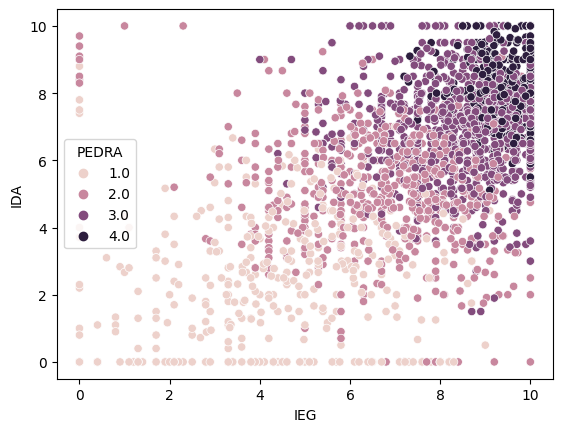

In [138]:
sns.scatterplot(data=df_2022_model_v2, x='IEG', y='IDA', hue='PEDRA')

In [139]:
df_2022_model_v2 = df_2022_model_v2.loc[~df_2022_model_v2['PEDRA'].isna()]

In [140]:
df_2022_model_v2.head()

,PEDRA,IEG,IDA
0,3.0,8.7,7.000000
1,3.0,8.9,5.500000
2,1.0,4.1,0.000000
3,3.0,8.0,7.500000
4,3.0,9.9,7.333333


In [141]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X = scaler.fit_transform(df_2022_model_v2)


km = KMeans(n_clusters=2,init='k-means++', random_state=42)

labels = km.fit_predict(X)

In [143]:
# visualização do resultado
import plotly.express as px
df_2022_model_v2['labels'] = labels.astype(str)
fig = px.scatter(df_2022_model_v2, x='IEG', y ='IDA', color='labels')
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
    width = 800
)

fig.show()

In [145]:
df_2022_model_v2.loc[(df_2022_model_v2['IEG'] < 1) & (df_2022_model_v2['IDA'] < 1)]

,PEDRA,IEG,IDA,labels
372,1.0,0.4,0.0,0
516,1.0,0.0,0.0,0
708,1.0,0.9,0.0,0
733,1.0,0.0,0.8,0
778,1.0,0.0,0.0,0
845,1.0,0.4,0.0,0
1084,1.0,0.4,0.0,0
1124,1.0,0.4,0.0,0
1221,1.0,0.0,0.0,0
1365,1.0,0.8,0.9,0


In [59]:
# visualização do resultado
import plotly.express as px
df_2022_model_v2['labels'] = labels.astype(str)
fig = px.scatter(df_2022_model_v2, x='IEG', y ='IDA', color='labels')
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
    width = 800
)

fig.show()

In [146]:
# visualização do resultado
import plotly.express as px
df_2022_model_v2['labels'] = labels.astype(str)
fig = px.scatter(df_2022_model_v2, x='IEG', y ='IDA', color='PEDRA')
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
    width = 800
)

fig.show()